In [1]:
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl

from vqvae import VQVAE
from vqvae.trainer import LITVqvae

from script import get_dataloader

# Reload python packages when changed
%load_ext autoreload
%autoreload 2

# Matplotlib defaults
plt.rcParams.update({
    "font.size": 25,
    "figure.figsize": (25, 5)
})

Using logger None.


In [2]:
class args:
    batch_size=16
    num_workers=4

N_CODEBOOK = 256
DIM_CODEBOOK = 32

channel_sizes = [16, 32, 32, DIM_CODEBOOK]
strides = [2, 2, 1, 1]

In [3]:
dataloader_val = get_dataloader(args, train=False)

Files already downloaded and verified


In [4]:
model = VQVAE(
    in_channel=3,
    channel_sizes=channel_sizes,
    n_codebook=N_CODEBOOK,
    dim_codebook=DIM_CODEBOOK,
    strides=strides,
)
model.load_state_dict(torch.load("model.pt"))
model.eval()
litmodule = LITVqvae(model=model)
trainer = pl.Trainer(gpus=1)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


## Reconstructions

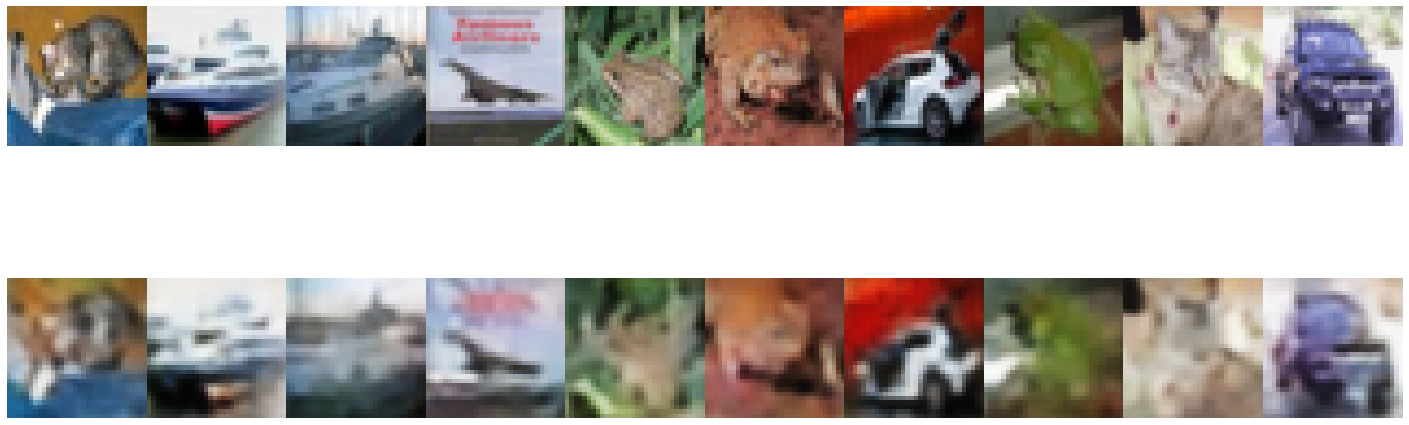

In [5]:
n_images = 10

for images, labels in dataloader_val:
    break
images = images[:n_images]
with torch.no_grad():
    reconstructions = torch.sigmoid(model(images))
    
# fig, axes = plt.subplots(nrows=2, ncols=n_images)
fig = plt.figure(figsize=(25, 10))
for idx, (image, reconstruction) in enumerate(zip(images, reconstructions)):
    plt.subplot(2, n_images, idx+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")
    
    plt.subplot(2, n_images, n_images+idx+1)
    plt.imshow(reconstruction.permute(1, 2, 0))
    plt.axis("off")

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [6]:
trainer.validate(litmodule, dataloader_val)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validating:   2%|██▍                                                                                                                                          | 11/625 [00:00<00:11, 52.00it/s]

/home/mrmojo/Code/these/vqvae/mixturevqvae/.env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:220: UserWarning: You called `self.log('rank', ...)` in your `validation_step` but the value needs to be floating point. Converting it to torch.float32.
  warning_cache.warn(


Validating:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 621/625 [00:06<00:00, 96.45it/s]--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'rank': 218.52639770507812, 'reconstruction_loss': 0.00431588152423501}
--------------------------------------------------------------------------------


[{'reconstruction_loss': 0.00431588152423501, 'rank': 218.52639770507812}]